In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline


In [4]:
data = pd.read_csv('movie_metadata.csv')
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
#Removing 'Null' values and blank cell
data.isnull().head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False


In [23]:
data = data.dropna()
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [12]:
print ('median is equal to :',data['imdb_score'].median())
print ('Mean is equal to :',data['imdb_score'].mean())
#median score of IMDB

median is equal to : 6.6
Mean is equal to : 6.442137616498111


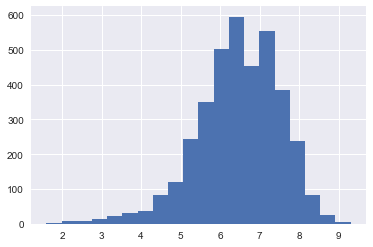

In [25]:
data['imdb_score'].hist(bins = 20)
#Most of the films are rated between 5.5 to 7.6 Rating

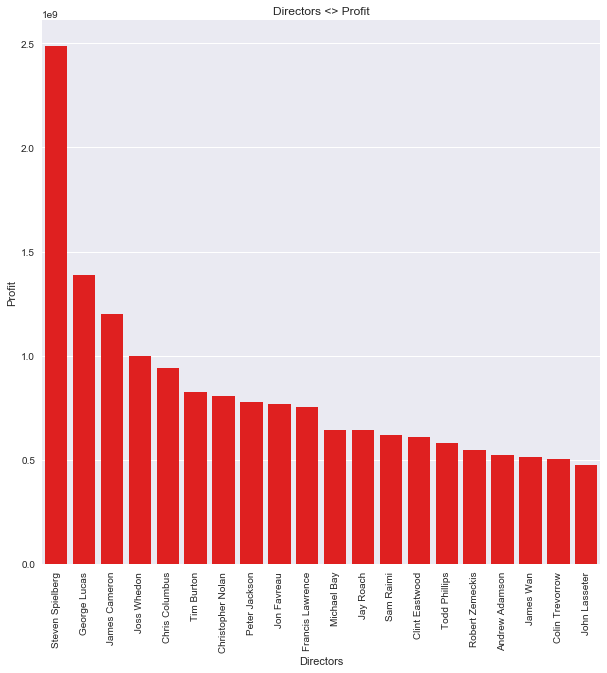

In [28]:
data['profit'] = data['gross'] - data['budget']
#Calculating the profit

dir_profit = data.groupby(data['director_name'])['profit'].sum()
#Total profit earned by each director.
dir_profit_index = dir_profit.sort_values(ascending=False)[:20].index
dir_profit_values = dir_profit.sort_values(ascending=False)[:20].values
#Top 20 Most earned directors.
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x = dir_profit_index,
            y = dir_profit_values,
            color='red',
            ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

plt.title('Directors <> Profit')
plt.xlabel('Directors')
plt.ylabel('Profit')

del fig,ax,ticks

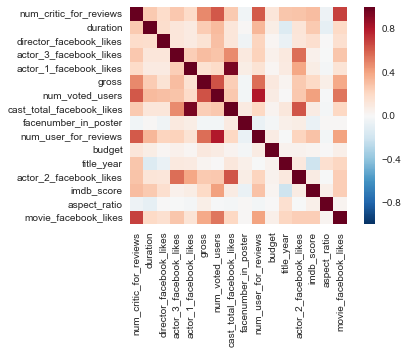

In [14]:
#co-relation plotting 
corrmat = data.corr()
sns.heatmap(corrmat,vmax = 1,square = True)
#Only title year and imdb_score are the attributes which are negatively co-related.
#movies_facebook_likes is highly co-related with num_critic_for_reviews which is logical.

In [ ]:
b = data.pivot_table(index = 'title_year',values = 'color',aggfunc = len)
#count of movies released on particular year.
b.head()

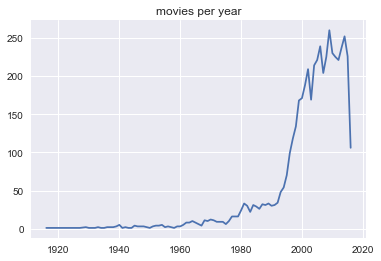

In [29]:
x_axis = b.index
values = b.values
plt.title('movies per year')
sns.plt.plot(x_axis,values)

In [11]:
#count of movies of each genre

genre_column_values = data['genres'].map(lambda x:x.split('|'))
genre_column_values.head()
#list of unique genres in movie dataset

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
5             [Action, Adventure, Sci-Fi]
Name: genres, dtype: object

In [36]:
#movies of unique genre
unique_genre= []
for genre in genre_column_values:
    for tpe in genre:
        if tpe not in unique_genre:
            unique_genre.append(tpe)
unique_genre


['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Thriller',
 'Romance',
 'Animation',
 'Comedy',
 'Family',
 'Musical',
 'Mystery',
 'Western',
 'Drama',
 'History',
 'Sport',
 'Crime',
 'Horror',
 'War',
 'Biography',
 'Music',
 'Documentary',
 'Film-Noir']

In [37]:
genre_cnt ={}
for val in unique_genre:
    cnt=0
    for rec in genre_column_values:
        if val in rec:
            cnt+=1
    genre_count[val] = cnt
genre_count
#total count of movies of each genre

{'Action': 959,
 'Adventure': 781,
 'Animation': 196,
 'Biography': 239,
 'Comedy': 1461,
 'Crime': 709,
 'Documentary': 45,
 'Drama': 1893,
 'Family': 442,
 'Fantasy': 507,
 'Film-Noir': 1,
 'History': 149,
 'Horror': 392,
 'Music': 151,
 'Musical': 96,
 'Mystery': 384,
 'Romance': 859,
 'Sci-Fi': 496,
 'Sport': 148,
 'Thriller': 1117,
 'War': 152,
 'Western': 59}

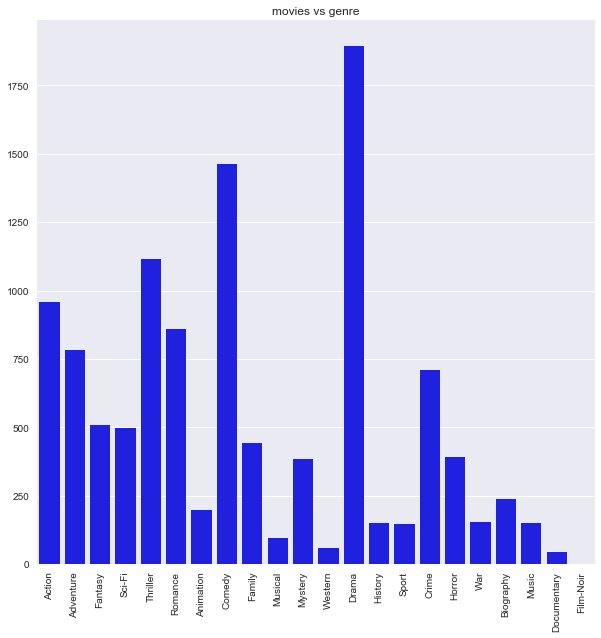

In [40]:
genre_counter =Counter(genre_count)
#Creating Dic for genre_count having value and count.
genre_idx = np.asarray(list(genre_counter.keys()))
genre_val = np.asarray(list(genre_counter.values()))
fig,ax1 = plt.subplots(figsize=(10,10))
sns.barplot(x = genre_idx, y = genre_val,color='blue',ax=ax1)
plt.title('movies vs genre')
ticks = plt.setp(ax1.get_xticklabels(),rotation=90)
del fig,ax1,ticks

In [41]:
lag= data.groupby('language')['movie_title'].count()
lag
#count of movies of each language

language
Aboriginal       2
Arabic           1
Aramaic          1
Bosnian          1
Cantonese        7
Czech            1
Danish           3
Dari             2
Dutch            3
English       3598
Filipino         1
French          34
German          10
Hebrew           1
Hindi            5
Hungarian        1
Indonesian       2
Italian          7
Japanese        10
Kazakh           1
Korean           5
Mandarin        15
Maya             1
Mongolian        1
None             1
Norwegian        4
Persian          3
Portuguese       5
Romanian         1
Russian          1
Spanish         23
Thai             3
Vietnamese       1
Zulu             1
Name: movie_title, dtype: int64

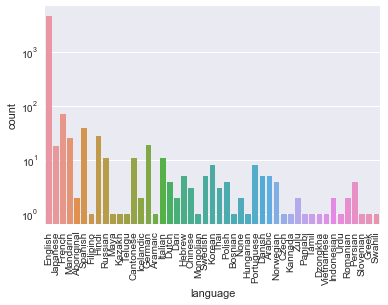

In [18]:
a=sns.countplot(x='language',data= data)
a.set_yscale('log')
lables= a.get_xticklabels()
a.set_xticklabels(lables, rotation=90)
#Bar graph for each language

In [19]:
def create_comparison_database(name, value, x, no_films):  
    comparison_df = data.groupby(name, as_index=False)
    if x == 'median':
        comparison_df = comparison_df.median()
    if x == 'mean':
        comparison_df = comparison_df.mean()
    if x == 'sum':
        comparison_df = comparison_df.sum() 
    # Create database with either name of directors or actors, the value being compared i.e. 'gross',
    # and number of films they're listed with. Then sort by value being compared.
    name_count_key = data[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    comparison_df.sort_values(value, ascending=False, inplace=True)
    comparison_df[name] = comparison_df[name].map(str) + " (" + comparison_df['films'].astype(str) + ")"
   
    # create a Series with the name as the index so it can be plotted to a subgrid
    comp_series = comparison_df[comparison_df['films'] >= no_films][[name, value]][10::-1].set_index(name).ix[:,0]
    
    return comp_series

C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


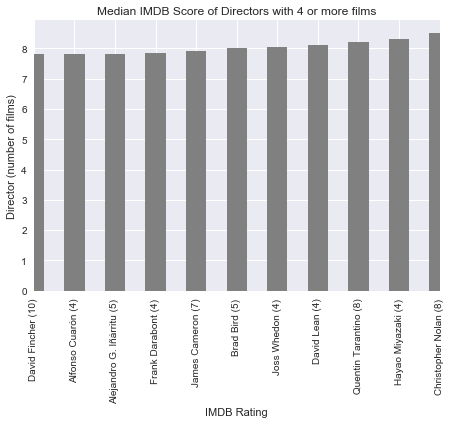

In [45]:
fig = plt.figure(figsize=(18,6))
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('director_name','imdb_score','median', 4).plot(kind='bar', color='grey')
plt.legend().set_visible(False)
plt.title('Median IMDB Score of Directors with 4 or more films')
plt.ylabel("Director (number of films)")
plt.xlabel("IMDB Rating")
plt.xlim(0,10)

plt.tight_layout()

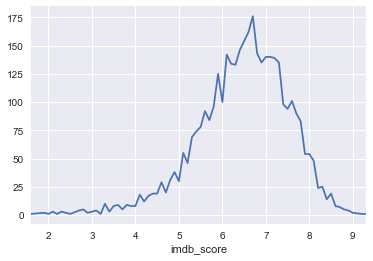

In [46]:
totalmovie_imdb = data.groupby('imdb_score')['movie_title'].count()
data_group_a = totalmovie_imdb
data_group_a.plot()